# CUSTOMER SUPPORT ON TWITTER

**About Dataset:**
The Customer Support on Twitter dataset is a large, modern corpus of tweets and replies to aid innovation in natural language understanding and conversational models, and for study of modern customer support practices and impact.
**Context:**
Natural language remains the densest encoding of human experience we have, and innovation in NLP has accelerated to power understanding of that data, but the datasets driving this innovation don't match the real language in use today. The Customer Support on Twitter dataset offers a large corpus of modern English (mostly) conversations between consumers and customer support agents on Twitter, and has three important advantages over other conversational text datasets:
Focused - Consumers contact customer support to have a specific problem solved, and the manifold of problems to be discussed is relatively small, especially compared to unconstrained conversational datasets like the reddit Corpus.
Natural - Consumers in this dataset come from a much broader segment than those in the Ubuntu Dialogue Corpus and have much more natural and recent use of typed text than the Cornell Movie Dialogs Corpus.
Succinct - Twitter's brevity causes more natural responses from support agents (rather than scripted), and to-the-point descriptions of problems and solutions. Also, its convenient in allowing for a relatively low message limit size for recurrent nets.

**Content:**
The dataset is a CSV, where each row is a tweet. The different columns are described below. Every conversation included has at least one request from a consumer and at least one response from a company. Which user IDs are company user IDs can be calculated using the inbound field.
**tweet_id:** A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.
**author_id:** A unique, anonymized user ID. @s in the dataset have been replaced with their associated anonymized user ID.
**inbound:** Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.
**created_at:** Date and time when the tweet was sent.
**text:** Tweet content. Sensitive information like phone numbers and email addresses are replaced with mask values like __email__.
**response_tweet_id:** IDs of tweets that are responses to this tweet, comma-separated.
**in_response_to_tweet_id:** ID of the tweet this tweet is in response to, if any.




**LOADING THE DATA:**

In [4]:
import pandas as pd
df = pd.read_csv('/Users/hepsiba/Downloads/support on twitter.csv')
df.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
5,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
6,119244,105836,True,Tue Oct 10 15:26:44 +0000 2017,"@VirginTrains yep, I've tried laptop too sever...",119245,119243.0
7,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
8,119242,105836,True,Tue Oct 10 15:09:00 +0000 2017,@VirginTrains I still haven't heard &amp; the ...,119240,119246.0
9,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0


**PRINTING THE COUPLE OF SENTENCES:**

In [7]:
print(repr(df.iloc[46]["text"][0:400]))
print(repr(df.iloc[50]["text"][0:400]))

"@SpotifyCares It's on a Macbook Air (early 2014), running High Sierra, spotify version 1.0.65.320.gac7a8e02"
'@AppleSupport Latest version 😡😡 I have read the help page turned off virtually all apps and location svs too - but in typing this I dropped 3% life'


**SPLITTING INTO SENTENCES:**

In [8]:
import pandas as pd
import re

# Function to split text into paragraphs and count them
def count_paragraphs(text):
    paragraphs = re.split(r'\.\s*\n', text)
    return len(paragraphs)

# Applying the function to each row
df["number_of_paragraphs"] = df["text"].apply(count_paragraphs)
print(df)

    tweet_id     author_id  inbound                      created_at  \
0     119237        105834     True  Wed Oct 11 06:55:44 +0000 2017   
1     119238  ChaseSupport    False  Wed Oct 11 13:25:49 +0000 2017   
2     119239        105835     True  Wed Oct 11 13:00:09 +0000 2017   
3     119240  VirginTrains    False  Tue Oct 10 15:16:08 +0000 2017   
4     119241        105836     True  Tue Oct 10 15:17:21 +0000 2017   
..       ...           ...      ...                             ...   
88    119330        105859     True  Wed Oct 11 13:50:42 +0000 2017   
89    119331        105860     True  Wed Oct 11 13:47:14 +0000 2017   
90    119332         Tesco    False  Wed Oct 11 13:34:06 +0000 2017   
91    119333        105861     True  Wed Oct 11 14:05:18 +0000 2017   
92    119335         Tesco    False  Wed Oct 11 15:38:07 +0000 2017   

                                                 text response_tweet_id  \
0   @AppleSupport causing the reply to be disregar...            119236 

**START BY GETTING TFIDF:**

In [9]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

# Define the TfidfVectorizer with the stop words list
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(93, 28)

**MAKING DATAFRAME OF SENTENCES:**

In [12]:
file= '/Users/hepsiba/Downloads/support on twitter.csv'
df = pd.read_csv(file)
df = pd.DataFrame(df)

# flatten the paragraphs keeping the years
df["paragraphs"] = df["text"].map(lambda text: re.split(r'\.\s*\n', text))

# Flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "tweet_id": year } 
                              for paragraphs, year in zip(df["paragraphs"], df["tweet_id"]) 
                              for paragraph in paragraphs if paragraph])

paragraph_df.head(10)

,text,tweet_id
0,@AppleSupport causing the reply to be disregar...,119237
1,@105835 Your business means a lot to us. Pleas...,119238
2,@76328 I really hope you all change but I'm su...,119239
3,@105836 LiveChat is online at the moment - htt...,119240
4,@VirginTrains see attached error message. I've...,119241
5,"@105836 Have you tried from another device, Mi...",119243
6,"@VirginTrains yep, I've tried laptop too sever...",119244
7,"@105836 It's working OK from here, Miriam. Doe...",119245
8,@VirginTrains I still haven't heard &amp; the ...,119242
9,@105836 That's what we're here for Miriam 😊 T...,119246


**GETTING THE TFIDF OF THE SENTENCES DF:**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your TfidfVectorizer with appropriate parameters
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform your text data to obtain the TF-IDF vectors
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Check the shape of the TF-IDF vectors
tfidf_para_vectors.shape

(96, 31)

**NMF:**

In [17]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

**10 TOPICS:**

In [18]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)


Topic 00
 co (41.24)
 https (41.24)
 gdrqu22ypt (4.53)
 dm (4.04)
 help (2.99)

Topic 01
 applesupport (45.85)
 help (15.87)
 ios (11.69)
 apps (11.33)
 version (9.36)

Topic 02
 tesco (91.72)
 look (6.88)
 ve (1.11)
 co (0.09)
 https (0.09)

Topic 03
 thanks (39.35)
 spotifycares (33.56)
 version (16.65)
 device (4.41)
 ay (2.42)

Topic 04
 ve (61.49)
 tried (22.15)
 spotifycares (12.40)
 happy (1.90)
 ios (1.50)

Topic 05
 hi (77.61)
 amp (7.77)
 device (5.21)
 thanks (2.88)
 happy (2.70)

Topic 06
 76099 (33.20)
 phone (29.70)
 update (24.25)
 apps (4.67)
 let (2.45)

Topic 07
 sorry (95.20)
 dm (4.76)
 device (0.04)
 version (0.00)
 https (0.00)

Topic 08
 let (17.95)
 know (17.53)
 ay (15.90)
 device (14.63)
 help (11.92)

Topic 09
 dm (24.83)
 send (14.57)
 look (13.97)
 gdrqu22ypt (13.75)
 happy (11.55)


**RUNNING THE SAME MODEL:**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
tfidf_para_vectorizer = CountVectorizer()

# Fit the vectorizer to your data
tfidf_para_vectorizer.fit(paragraph_df["text"])

# Now you can access the feature names
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 105842 (76.17)
 105840 (3.88)
 105836 (3.64)
 105838 (3.05)
 03331 (3.02)

Topic 01
 03am (44.66)
 105840 (15.95)
 105843 (10.80)
 0m2mph15eh (8.91)
 105859 (8.78)

Topic 02
 105853 (85.64)
 105837 (5.32)
 105848 (4.66)
 105857 (4.09)
 105858 (0.18)

Topic 03
 105854 (23.66)
 105835 (15.27)
 10 (12.15)
 105840 (8.53)
 105837 (8.31)

Topic 04
 105858 (44.85)
 105855 (25.60)
 105857 (14.01)
 105844 (6.13)
 105846 (1.99)

Topic 05
 105841 (66.50)
 105857 (11.95)
 03331 (8.29)
 105847 (4.57)
 105835 (3.35)

Topic 06
 105849 (26.17)
 031 (25.25)
 105856 (20.11)
 105844 (6.85)
 105676 (5.75)

Topic 07
 105851 (70.97)
 105844 (24.89)
 105836 (3.71)
 0m2mph15eh (0.43)
 105843 (0.00)

Topic 08
 105836 (25.61)
 105838 (14.83)
 105850 (12.88)
 105848 (11.29)
 105839 (10.31)

Topic 09
 105852 (58.36)
 105859 (18.96)
 105858 (5.37)
 105854 (5.08)
 105843 (3.22)


**BIGGEST TOPIC:**

Topic 01 as the biggest topic

In [22]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([13.05680956,  8.38572365,  8.27614048,  7.74886609,  7.2308482 ,
       10.32998397, 10.28864501,  6.85761512, 13.37146756, 14.45390037])

**TOPIC SIZES:**

In [23]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.44169099,  7.7166093 ,  9.95314303,  8.91042633,  8.1048243 ,
       10.75132303,  8.64960445,  8.36859455, 15.88922259, 10.21456144])

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(96, 29)

**LATENT DIRICHLET ALLOCATION (LDA):**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

(96, 29)

**RUNNING THE LDA:**

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

**DISPLAYING THE OUTPUT:**

In [28]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)


Topic 00
 help (29.62)
 device (27.67)
 thanks (12.55)
 ay (9.53)
 dm (5.20)

Topic 01
 76099 (31.04)
 update (26.67)
 phone (26.55)
 apps (4.81)
 applesupport (0.44)

Topic 02
 tesco (74.31)
 look (0.92)
 ve (0.92)
 https (0.92)
 co (0.92)

Topic 03
 applesupport (37.57)
 sorry (26.98)
 hi (5.82)
 happy (5.82)
 ios (5.82)

Topic 04
 https (22.73)
 co (22.73)
 dm (14.60)
 gdrqu22ypt (9.79)
 help (8.47)

Topic 05
 let (32.53)
 know (24.50)
 ll (12.45)
 ay (12.45)
 hi (4.42)

Topic 06
 ios (16.47)
 hi (16.47)
 version (13.77)
 apps (11.07)
 applesupport (11.07)

Topic 07
 spotifycares (31.42)
 version (19.10)
 battery (19.10)
 thanks (14.99)
 ay (0.62)

Topic 08
 thanks (46.90)
 look (21.46)
 happy (1.17)
 amp (1.17)
 ll (1.17)

Topic 09
 ve (40.52)
 tried (24.47)
 amp (12.44)
 spotifycares (8.42)
 phone (4.53)


**TOPIC SIZES:**

In [29]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.52530519,  9.00374428,  7.11732005,  8.97496262, 24.22096841,
        7.91098002, 11.43731282,  7.91541679,  5.49644734,  9.39754247])

**PYLDAVIS:**

In [31]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [33]:
def display_topics(model, vectorizer, no_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
display_topics(lda_para_model, count_para_vectorizer, no_top_words=10)

Topic 0:
help device thanks ay dm hi version ll tried applesupport
Topic 1:
76099 update phone apps applesupport battery ve ll let hi
Topic 2:
tesco look ve https co hi ll help amp send
Topic 3:
applesupport sorry hi happy ios ve help battery phone dm
Topic 4:
https co dm gdrqu22ypt help send look happy thanks ll
Topic 5:
let know ll ay hi device amp help spotifycares gdrqu22ypt
Topic 6:
ios hi version apps applesupport help battery phone ll amp
Topic 7:
spotifycares version battery thanks ay phone 76099 applesupport know device
Topic 8:
thanks look happy amp ll dm hi tesco help send
Topic 9:
ve tried amp spotifycares phone help co https know device


In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**WORDCLOUD FOR 10 TOPICS:**

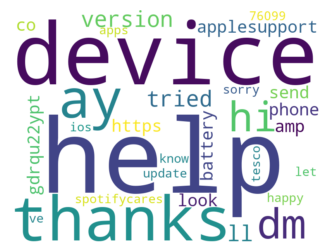

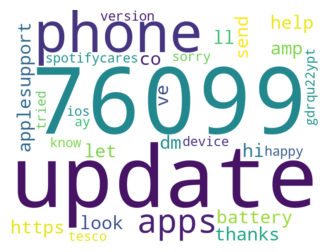

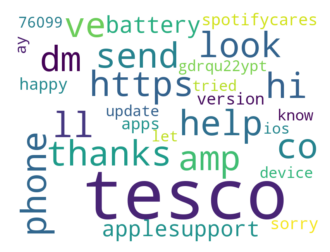

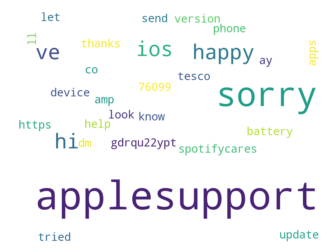

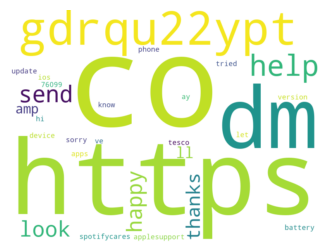

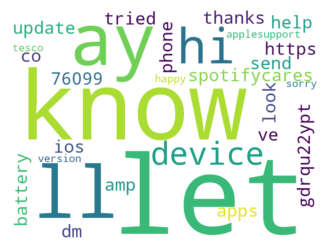

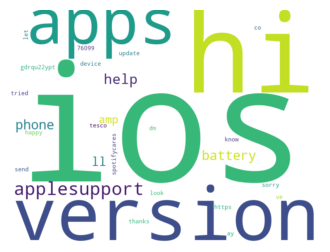

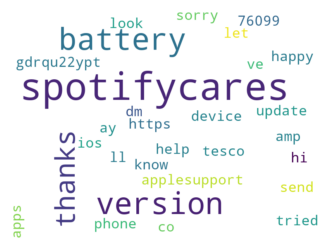

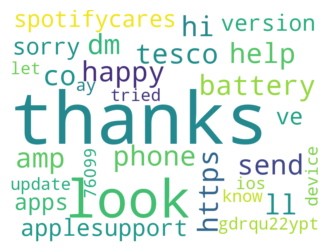

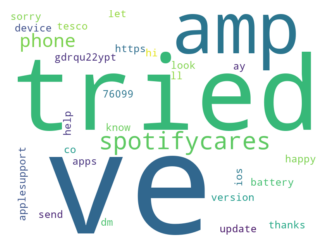

In [36]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def display_topics(lda_model, count_vectorizer, num_topics):
    feature_names = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(f'topic{topic_idx}.png')
        plt.show()

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
num_topics = 10  # Adjust this number as per your requirement
display_topics(lda_para_model, count_para_vectorizer, num_topics)

**NMF WORDCLOUD:**

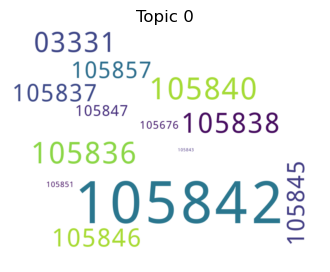

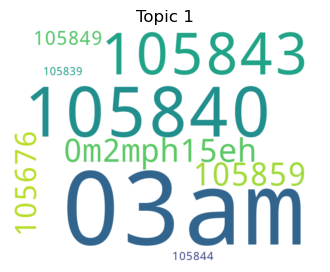

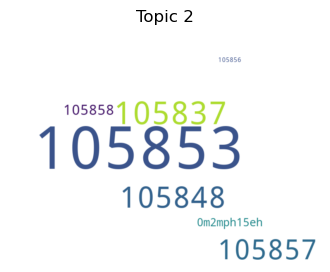

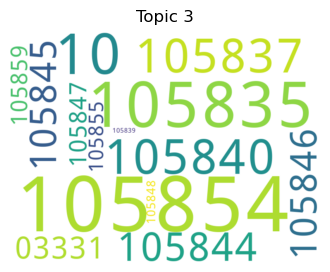

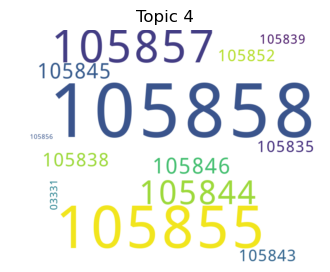

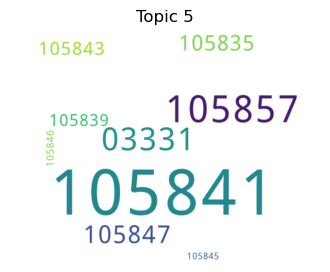

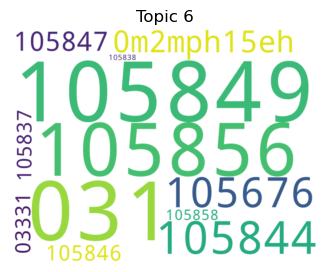

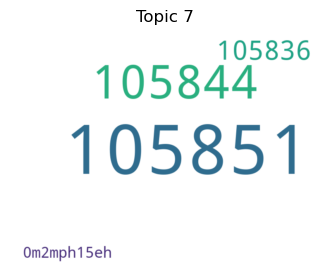

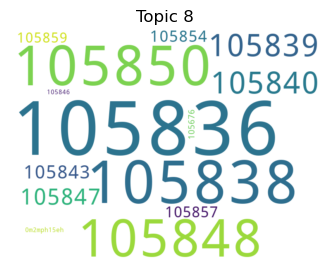

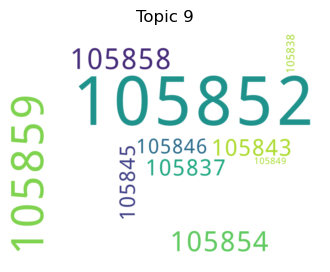

In [37]:
def wordcloud_topics(model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))  # Set the figure size here
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Assuming you already have the NMF model and vectorizer
# Replace nmf_para_model with your NMF model and tfidf_para_vectorizer with your vectorizer
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer)

**LDA WORDCLOUD:**

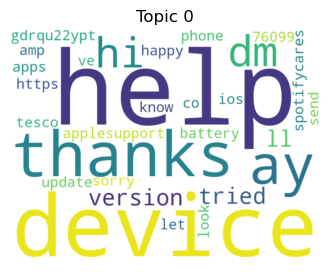

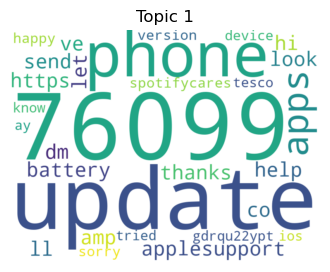

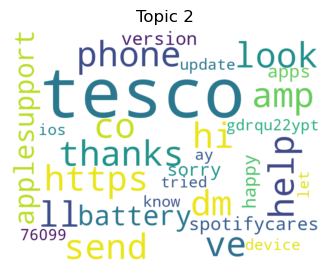

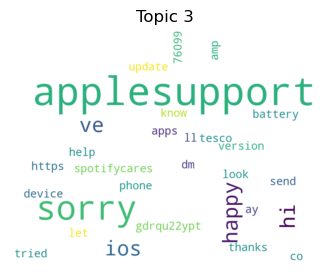

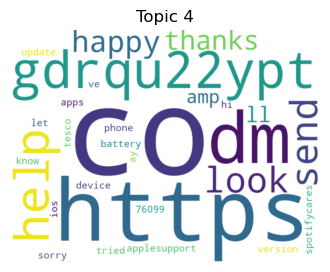

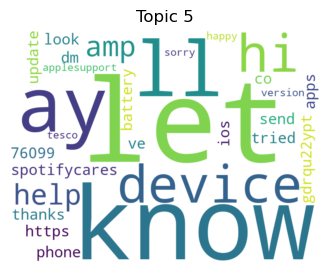

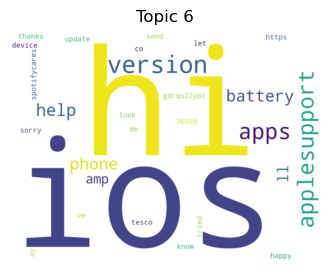

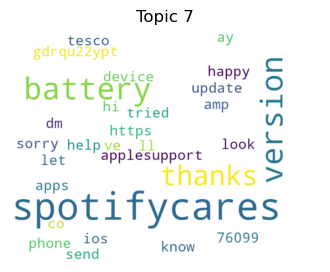

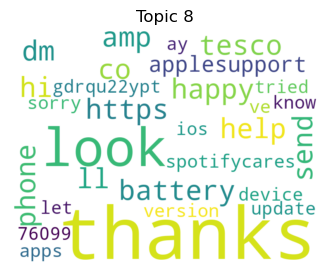

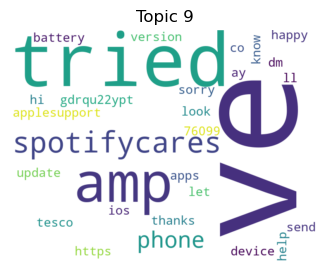

In [38]:
def wordcloud_topics(lda_model, vectorizer, num_topics=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))  # Set the figure size here
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
wordcloud_topics(lda_para_model, count_para_vectorizer, num_topics=10)

**GIVING TOPIC NAMES BY JOINING TOP 2WORDS:**

In [39]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    topic_words = [voc[ind] for ind in important[-20:]]
    topic_names.append(" ".join(topic_words))
topic_names

['105844 105839 03am 0m2mph15eh 10 105835 105859 105843 105851 105676 105847 105857 105837 105845 105846 03331 105838 105836 105840 105842',
 '105854 105838 105837 105836 105835 105855 10 105856 105857 03331 105851 105839 105844 105849 105676 105859 0m2mph15eh 105843 105840 03am',
 '105842 105844 105840 03331 03am 10 105841 105835 105676 105836 105838 105839 105859 105856 0m2mph15eh 105858 105857 105848 105837 105853',
 '105676 105856 0m2mph15eh 03am 105857 105853 105839 105848 105855 105859 105847 03331 105846 105845 105844 105837 105840 10 105835 105854',
 '105859 10 105837 03am 105836 105676 0m2mph15eh 105856 03331 105839 105835 105843 105852 105838 105845 105846 105844 105857 105855 105858',
 '105842 105844 105840 03am 0m2mph15eh 10 105676 105837 105836 105838 105859 105845 105846 105839 105843 105835 105847 03331 105857 105841',
 '105842 105839 105836 105835 10 03am 105840 105855 105838 105858 105837 03331 105846 105847 0m2mph15eh 105676 105844 105856 031 105849',
 '105846 105845 

**SEPARATE DATA BY YEAR:**

In [41]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["tweet_id"]))):
    W_year =nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["tweet_id"] == year)])
    year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/93 [00:00<?, ?it/s]

/var/folders/n0/4tgmz7811nn1bzv6h51d30v80000gn/T/ipykernel_21314/2167402648.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/n0/4tgmz7811nn1bzv6h51d30v80000gn/T/ipykernel_21314/2167402648.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/n0/4tgmz7811nn1bzv6h51d30v80000gn/T/ipykernel_21314/2167402648.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/n0/4tgmz7811nn1bzv6h51d30v80000gn/T/ipykernel_21314/2167402648.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/n0/4tgmz7811nn1bzv6h51d30v80000gn/T/ipykernel_21314/2167402648.py:6: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] +list(W_year.sum

**TIME CHART:**

<Axes: xlabel='tweet_id'>

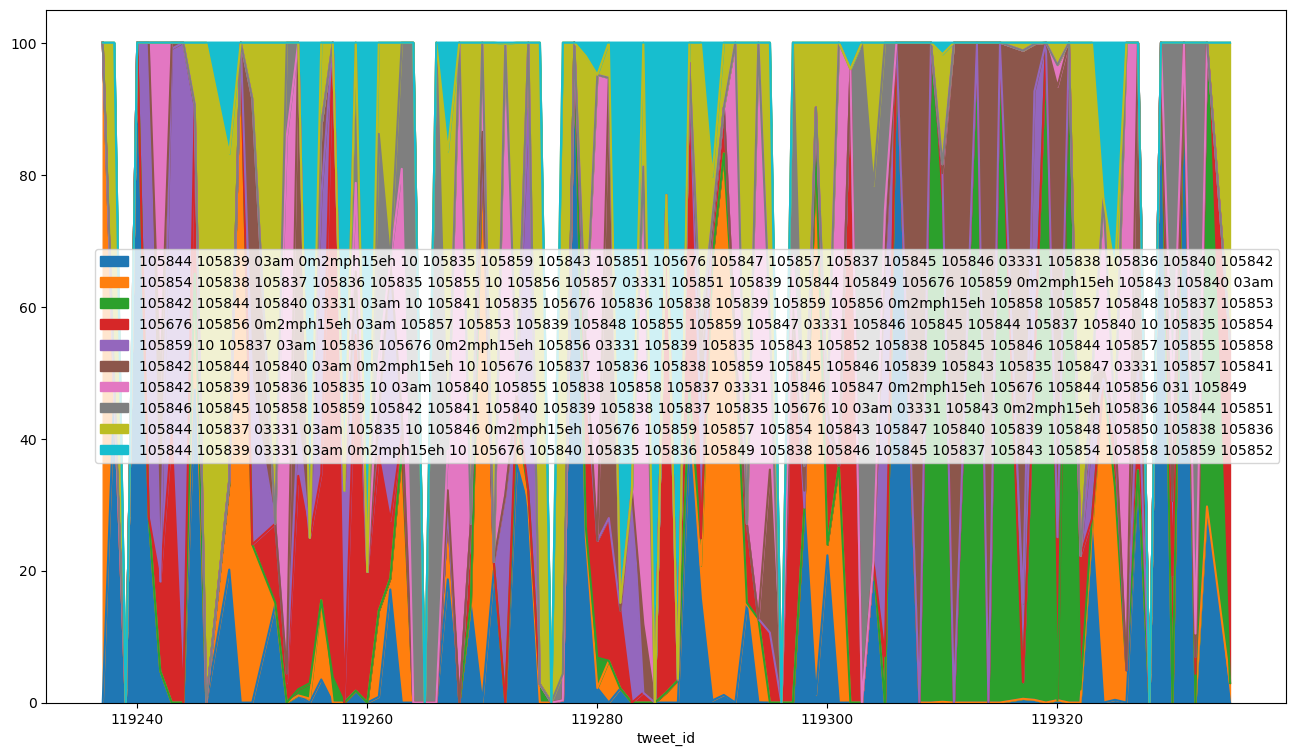

In [44]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["tweet_id"] + topic_names).set_index("tweet_id")
df_year.plot.area(figsize=(16,9))